# HealthCare
---
This includes a dataset representing insurance costs for individuals. It uses information such as age, sex, bmi, and smoking habits to determine the cost on the insurance company for that person.

The idea is to present a machine learning model that predicts the cost with the highest accuracy.

## Insurance HealthCare Costs
---

This observes the cost of healthcare for a sample of the population given smoking habits, age, sex, bmi, and region. The data features observations of statistical informaton and regression analysis of the dataset.

The goal is to find the best estimator of insurance charges using machine learning algorithms. 

---

### Acknowledgements
Data imported from [Kaggle](https://www.kaggle.com/mirichoi0218/insurance). Visit their page for publicly available datasets to practice with ML and creating pipelines.

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline

df = pd.read_csv('insurance.csv') # import the CSV as a pandas dataframe

df.head() # show the first five rows

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [23]:
df

,age,bmi,children,charges,sex_female,sex_male,smoker_no,smoker_yes,region_northeast,region_northwest,region_southeast,region_southwest
0,19.0,27.900,0.0,16884.92400,1,0,0,1,0,0,0,1
1,18.0,33.770,1.0,1725.55230,0,1,1,0,0,0,1,0
2,28.0,33.000,3.0,4449.46200,0,1,1,0,0,0,1,0
3,33.0,22.705,0.0,21984.47061,0,1,1,0,0,1,0,0
4,32.0,28.880,0.0,3866.85520,0,1,1,0,0,1,0,0
5,31.0,25.740,0.0,3756.62160,1,0,1,0,0,0,1,0
6,46.0,33.440,1.0,8240.58960,1,0,1,0,0,0,1,0
7,37.0,27.740,3.0,7281.50560,1,0,1,0,0,1,0,0
8,37.0,29.830,2.0,6406.41070,0,1,1,0,1,0,0,0
9,60.0,25.840,0.0,28923.13692,1,0,1,0,0,1,0,0


In [2]:
# check for missing values
missing_values = df.isnull().sum().sort_values(ascending = False)
missing_values = missing_values[missing_values > 0]/df.shape[0] # normalize
print(f'{missing_values *100} %')

Series([], dtype: float64) %


In [3]:
df

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
5,31,female,25.740,0,no,southeast,3756.62160
6,46,female,33.440,1,no,southeast,8240.58960
7,37,female,27.740,3,no,northwest,7281.50560
8,37,male,29.830,2,no,northeast,6406.41070
9,60,female,25.840,0,no,northwest,28923.13692


No missing values, we can move on.

In [4]:
from sklearn.preprocessing import LabelEncoder

# convert str values to int using the scikit-learn encoder

st = df.apply(LabelEncoder().fit_transform)

st.head()

,age,sex,bmi,children,smoker,region,charges
0,1,0,197,0,1,3,1005
1,0,1,350,1,0,2,57
2,10,1,331,3,0,2,306
3,15,1,73,0,0,1,1097
4,14,1,223,0,0,1,254


Using the converted dataset, we can visualize the correlation heatmap

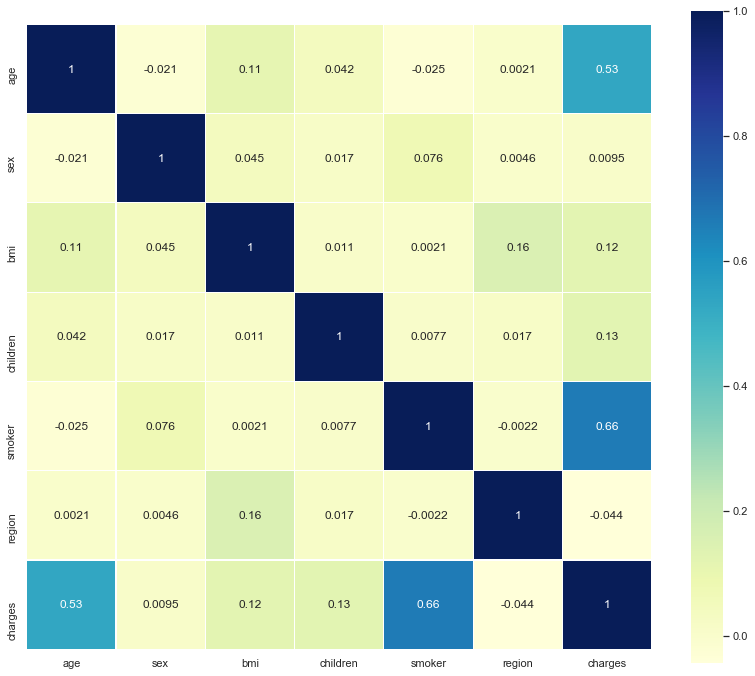

In [5]:
sns.set(color_codes=True)
plt.figure(figsize=(14, 12))
sns.heatmap(st.astype(float).corr(), 
            linewidths=0.2, 
            square=True, 
            linecolor='white', 
            annot=True,
            cmap="YlGnBu")
plt.show()

Seems like age and smoking weigh the most when looking at the charges row (or column). We expect the weights of these two to be higher than the rest.   

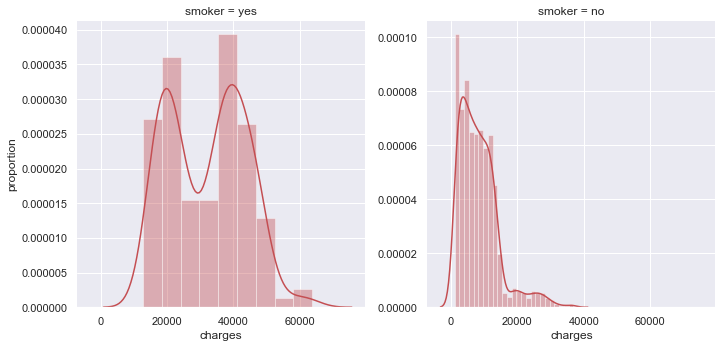

In [6]:
g = sns.FacetGrid(df, col="smoker",  height= 5, sharey=False, sharex = True)
g.map(sns.distplot, "charges", color = 'r');
g.set_axis_labels("charges", "proportion");
g.despine(left=True)

No surprise that smokers pay more for healtcare.

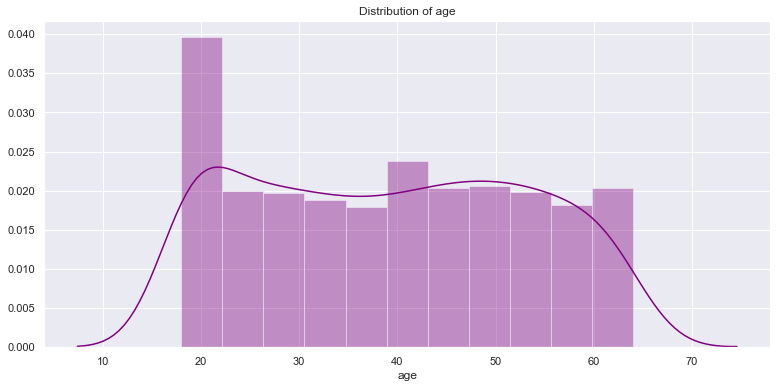

In [7]:
plt.figure(figsize=(13,6))
plt.title("Distribution of age")
ax = sns.distplot(df["age"], color = 'purple')

Judging by the party life at UVa, we can see why so many young adults even seek medical care.

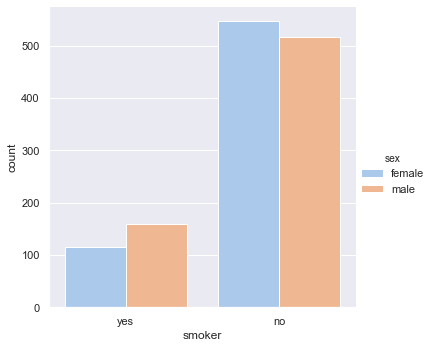

In [8]:
sns.catplot(x="smoker", kind="count", hue = 'sex', data = df , palette='pastel');
plt.show()

Luckily, the majority understands the downsides of smoking.

The data seems pretty balanced with a slight skew towards male.

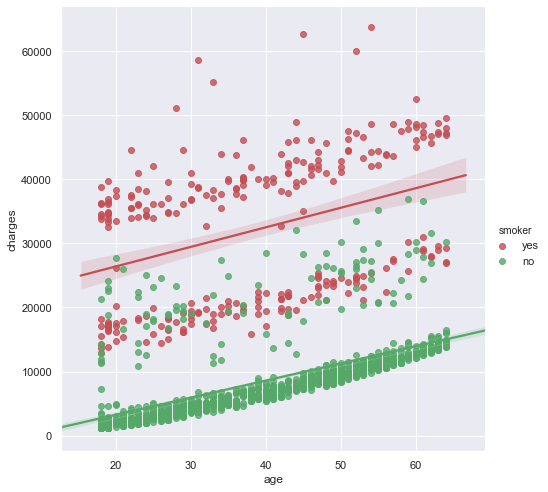

In [9]:
sns.lmplot(x="age", y="charges", hue="smoker", data=df, palette=dict(yes="r", no="g"), height = 7);
ax.set_title('Smokers and non-smokers');
plt.show()

While it seems obvious that the charges increase linearly with age, smoking appears to be the highest contributor to charges.

### Machine Learning

First step is to apply get dummies which works like this: 

The `pandas.get_dummies` converts the vectors of categorical features into a vector-matrix multiplication with a boolean matrix of ones and zeros. This will be more useful since our regressor will treat the inputs as numbers instead of integers.

Here is an example of how it works:

$\vec{b}=\beta \vec{x}$

Observe how the dummies matrix is represented for the smoker categorical feature:

$$\begin{pmatrix}\text{smoker_yes}\\ \text{smoker_no}\\ \text{smoker_no}\\ \vdots  \end{pmatrix}=\begin{bmatrix}
    1 & 0 \\
    0 & 1\\
    0 & 1\\
    \vdots & \vdots \\
    \end{bmatrix} \; 
    \begin{pmatrix}\text{smoker_yes} \\  \text{smoker_no} \\ \end{pmatrix}$$

In [10]:
df['age'] = df['age'].astype(float)
df['children'] = df['children'].astype(float)

df = pd.get_dummies(df)

df.head()

,age,bmi,children,charges,sex_female,sex_male,smoker_no,smoker_yes,region_northeast,region_northwest,region_southeast,region_southwest
0,19.0,27.900,0.0,16884.92400,1,0,0,1,0,0,0,1
1,18.0,33.770,1.0,1725.55230,0,1,1,0,0,0,1,0
2,28.0,33.000,3.0,4449.46200,0,1,1,0,0,0,1,0
3,33.0,22.705,0.0,21984.47061,0,1,1,0,0,1,0,0
4,32.0,28.880,0.0,3866.85520,0,1,1,0,0,1,0,0


In [11]:
y = df['charges']
X = df.drop(columns=['charges'])

Since no testing data is provided, we will split the given dataset into training and testing sets.

In [12]:
from sklearn.model_selection import train_test_split


# use 10% of dataset as testing data

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.1, random_state=42)

In [13]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error


lr = LinearRegression().fit(X_train, y_train)

lr_train_pred = lr.predict(X_train)
lr_test_pred = lr.predict(X_test)

lr_train_mse = mean_squared_error(y_train, lr_train_pred)
lr_test_mse = mean_squared_error(y_test, lr_test_pred)

print('MSE train data: {:.5}, MSE test data: {:.5}'.format(lr_train_mse, lr_test_mse))

print('RMSE train data: {:.5}, RMSE test data: {:.5}'.format(
    np.sqrt(np.absolute(lr_train_mse)), 
    np.sqrt(np.absolute(lr_train_mse))))
                                                               
print('R2 train data: {:.5}, R2 test data: {:.5}'.format(
    r2_score(y_train,lr_train_pred),
    r2_score(y_test,lr_test_pred)))

MSE train data: 3.6994e+07, MSE test data: 3.2276e+07
RMSE train data: 6082.3, RMSE test data: 6082.3
R2 train data: 0.74915, R2 test data: 0.76604


In [14]:
from sklearn.model_selection import cross_val_score
lr_cv = cross_val_score(LinearRegression(), X, y, cv = 7)
# accuracy +/- 2 standard deviations
print("Accuracy: {:.2} (+/- {:.2})".format(lr_cv.mean(), lr_cv.std() * 2)) 

Accuracy: 0.74 (+/- 0.079)


This isn't too bad for a first try. What happens if we implement polynomial features?

Polynomial features works on adding a matrix of polynomial coefficients of up to the $k^{th}$ order, generated by non-linear relationships of current features.

For the case of $k=2$ it looks something like this:

$$A\cdot(x_1+x_2+..+x_n)^2 = a_1 x_1^2+a_2 x_1 x_2 + a_3 x_2^2+a_4 x_2 x_3+..$$

Where $a_i$ represents the coefficient for Linear Regression to manipulate.

This helps us see the effect of non-linear relationships between features.

In [15]:
from sklearn.preprocessing import PolynomialFeatures

X_poly =  PolynomialFeatures(degree = 2).fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(
    X_poly, y, test_size=0.1, random_state=42)

In [16]:
pr = LinearRegression().fit(X_train, y_train)

pr_train_pred = pr.predict(X_train)
pr_test_pred = pr.predict(X_test)

pr_train_mse = mean_squared_error(y_train,pr_train_pred)
pr_test_mse = mean_squared_error(y_test,pr_test_pred)


print('MSE train data: {:.5}, MSE test data: {}'.format(pr_train_mse, pr_test_mse))

print('RMSE train data: {:.5}, RMSE test data: {:.5}'.format(
    np.sqrt(np.absolute(pr_train_mse)), 
    np.sqrt(np.absolute(pr_train_mse))))
                                                               
print('R2 train data: {:.5}, R2 test data: {:.5}'.format(
    r2_score(y_train,pr_train_pred),
    r2_score(y_test,pr_test_pred)))

MSE train data: 2.2632e+07, MSE test data: 20052020.438064184
RMSE train data: 4757.3, RMSE test data: 4757.3
R2 train data: 0.84654, R2 test data: 0.85465


In [17]:
pr_cv = cross_val_score(LinearRegression(), X_poly, y, cv = 7)
# accuracy +/- 2 standard deviations
print("Accuracy: {:.2} (+/- {:.2})".format(pr_cv.mean(), pr_cv.std() * 2)) 

Accuracy: 0.79 (+/- 0.11)


Splendid! Now we have a better variance score using polynomial relationships.

In [18]:
from sklearn.ensemble import RandomForestRegressor

rfr = RandomForestRegressor(n_estimators = 50).fit(X_train, y_train)

rfr_train_pred = rfr.predict(X_train)
rfr_test_pred = rfr.predict(X_test)


rfr_train_mse = mean_squared_error(y_train,rfr_train_pred)
rfr_test_mse = mean_squared_error(y_test,rfr_test_pred)


print('MSE train data: {:.5}, MSE test data: {:.5}'.format(rfr_train_mse, rfr_test_mse))

print('RMSE train data: {:.5}, RMSE test data: {:.5}'.format(
    np.sqrt(np.absolute(rfr_train_mse)), 
    np.sqrt(np.absolute(rfr_train_mse))))
                                                               
print('R2 train data: {:.5}, R2 test data: {:.5}'.format(
    r2_score(y_train, rfr_train_pred),
    r2_score(y_test, rfr_test_pred)))

MSE train data: 3.8055e+06, MSE test data: 2.1709e+07
RMSE train data: 1950.8, RMSE test data: 1950.8
R2 train data: 0.9742, R2 test data: 0.84264


In [19]:
rfr_cv = cross_val_score(RandomForestRegressor(n_estimators = 50), X_poly, y, cv = 7)
# accuracy +/- 2 standard deviations
print("Accuracy: {:.2} (+/- {:.2})".format(rfr_cv.mean(), rfr_cv.std() * 2)) 

Accuracy: 0.83 (+/- 0.09)


In [20]:
from sklearn.linear_model import BayesianRidge

br = BayesianRidge().fit(X_train, y_train)

br_train_pred = br.predict(X_train)
br_test_pred = br.predict(X_test)


br_train_mse = mean_squared_error(y_train, br_train_pred)
br_test_mse = mean_squared_error(y_test, br_test_pred)


print('MSE train data: {:.5}, MSE test data: {:.5}'.format(br_train_mse, br_test_mse))

print('RMSE train data: {:.5}, RMSE test data: {:.5}'.format(
    np.sqrt(np.absolute(br_train_mse)), 
    np.sqrt(np.absolute(br_train_mse))))
                                                               
print('R2 train data: {:.5}, R2 test data: {:.5}'.format(
    r2_score(y_train, br_train_pred),
    r2_score(y_test, br_test_pred)))

MSE train data: 2.453e+07, MSE test data: 2.0244e+07
RMSE train data: 4952.8, RMSE test data: 4952.8
R2 train data: 0.83366, R2 test data: 0.85326


In [21]:
br_cv = cross_val_score(BayesianRidge(), X_poly, y, cv = 7)
# accuracy +/- 2 standard deviations
print("Accuracy: {:.2} (+/- {:.2})".format(br_cv.mean(), br_cv.std() * 2)) 

Accuracy: 0.83 (+/- 0.069)


This is a decent prediction, we can safely assume that the Random Forest wins with a variance score of 97% against training data, and 84% against data it has never seen before. It also has the lowest root MSE value.

With cross-validation, however, Bayesian regression gets the same average as the Random Forest but with a smaller standard deviation using 7 folds.

We do not have to worry about overfitting with Random Forest.

In [22]:
import statsmodels.api as sm
lm=sm.OLS(y_train, X_train).fit()
lm.summary()

D:\Anaconda Installed\lib\site-packages\statsmodels\base\model.py:1294: RuntimeWarning: invalid value encountered in true_divide
  return self.params / self.bse
D:\Anaconda Installed\lib\site-packages\scipy\stats\_distn_infrastructure.py:877: RuntimeWarning: invalid value encountered in greater
  return (self.a < x) & (x < self.b)
D:\Anaconda Installed\lib\site-packages\scipy\stats\_distn_infrastructure.py:877: RuntimeWarning: invalid value encountered in less
  return (self.a < x) & (x < self.b)
D:\Anaconda Installed\lib\site-packages\scipy\stats\_distn_infrastructure.py:1831: RuntimeWarning: invalid value encountered in less_equal
  cond2 = cond0 & (x <= self.a)


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                charges   R-squared:                       0.847
Model:                            OLS   Adj. R-squared:                  0.842
Method:                 Least Squares   F-statistic:                     178.8
Date:                Sat, 07 Dec 2019   Prob (F-statistic):               0.00
Time:                        11:53:46   Log-Likelihood:                -11903.
No. Observations:                1204   AIC:                         2.388e+04
Df Residuals:                    1167   BIC:                         2.407e+04
Df Model:                          36                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const      -3332.9124    911.763     -3.655      0.000   -5121.791   -1544.034
x1           -26.1169     37.198     -0.702      0.483     -99.098      46.865
x2           488.3832     89.138      5.479      0.000     313.494     663.272
x3           572.0793    335.910      1.703      0.089     -86.976    1231.135
x4         -1370.6066    543.354     -2.522      0.012   -2436.667    -304.546
x5         -1962.3058    544.081     -3.607      0.000   -3029.793    -894.819
x6          2173.0810    541.395      4.014      0.000    1110.865    3235.297
x7         -5505.9934    626.093     -8.794      0.000   -6734.387   -4277.600
x8          -871.5556    477.548     -1.825      0.068   -1808.505      65.394
x9         -1047.6317    526.655     -1.989      0.047   -2080.928     -14.335
x10         -619.1004    613.961     -1.008      0.313   -1823.691     585.490
x11         -794.6247    526.208     -1.510      0.131   -1827.044     237.794
x12            3.8815      0.874      4.440      0.000       2.166       5.597
x13            0.6363      1.746      0.364      0.716      -2.789       4.062
x14          -10.1266      9.181     -1.103      0.270     -28.139       7.886
x15          -18.4099     21.237     -0.867      0.386     -60.076      23.256
x16           -7.7069     21.113     -0.365      0.715     -49.130      33.716
x17          -14.5364     21.438     -0.678      0.498     -56.597      27.525
x18          -11.5805     23.571     -0.491      0.623     -57.827      34.666
x19          -44.4967     19.265     -2.310      0.021     -82.294      -6.700
x20          -10.8170     19.495     -0.555      0.579     -49.067      27.433
x21           12.7486     21.082      0.605      0.545     -28.615      54.112
x22           16.4483     20.421      0.805      0.421     -23.617      56.513
x23           -5.9300      3.176     -1.867      0.062     -12.161       0.301
x24            4.0744     19.991      0.204      0.839     -35.147      43.296
x25          231.0280     50.791      4.549      0.000     131.376     330.680
x26          257.3552     50.691      5.077      0.000     157.899     356.811
x27         -498.1010     52.534     -9.481      0.000    -601.173    -395.029
x28          986.4842     54.958     17.950      0.000     878.656    1094.312
x29          195.8406     44.884      4.363      0.000     107.779     283.902
x30          135.2382     48.385      2.795      0.005      40.307     230.169
x31           65.3659     55.170      1.185      0.236     -42.878     173.610
x32           91.9385     49.167      1.870      0.062      -4.527     188.404
x33         -133.2478     87.238     -1.527      0.127    -304.408      37.912
x34          399.6679    208.181      1.920      0.055      -8.784     808.119
x35          172.4115    202.754      0.850      0.395    -225.391     570.214
x3